In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Filling missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
# Filling missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

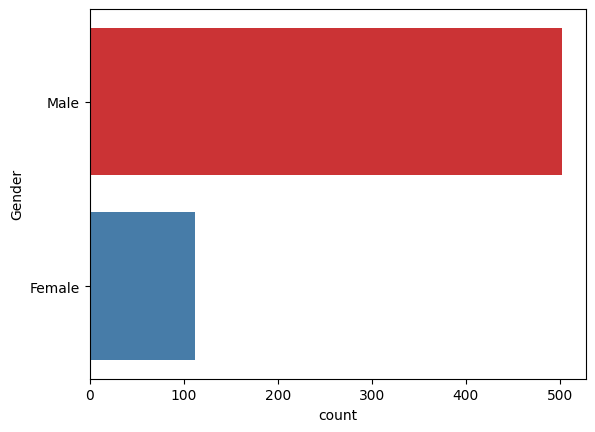

In [ ]:
#EDA
# categorical attributes visualization
sns.countplot(df['Gender'],palette='Set1')


<Axes: xlabel='count', ylabel='Married'>

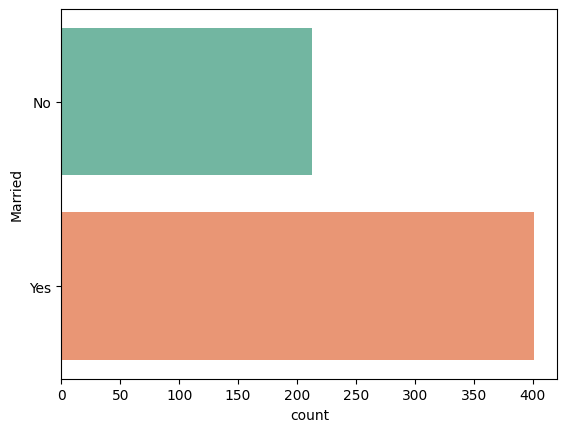

In [ ]:
sns.countplot(df['Married'],palette='Set2')

<Axes: xlabel='count', ylabel='Dependents'>

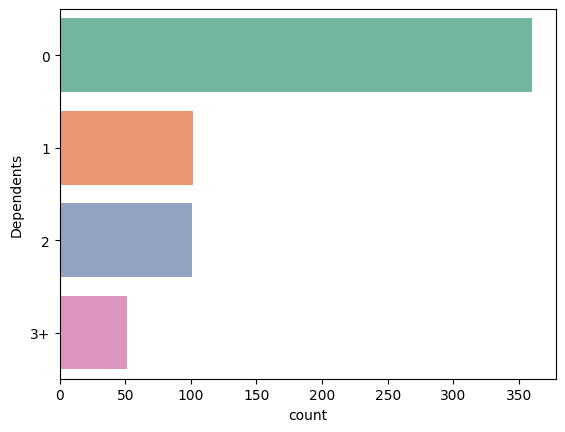

In [ ]:
sns.countplot(df['Dependents'],palette='Set2')

<Axes: xlabel='count', ylabel='Education'>

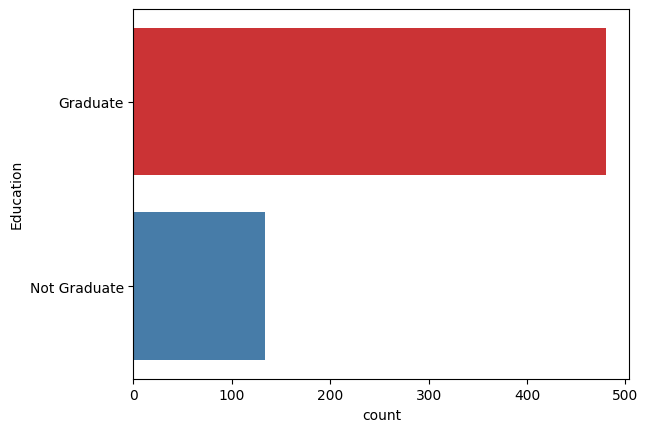

In [ ]:
sns.countplot(df['Education'],palette='Set1')

<Axes: xlabel='count', ylabel='Self_Employed'>

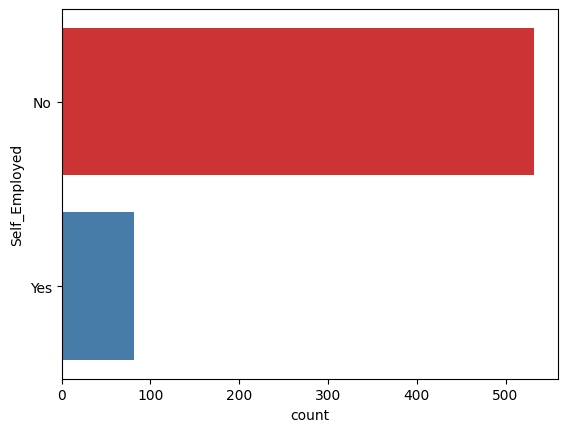

In [ ]:
sns.countplot(df['Self_Employed'],palette='Set1')

<Axes: xlabel='count', ylabel='Property_Area'>

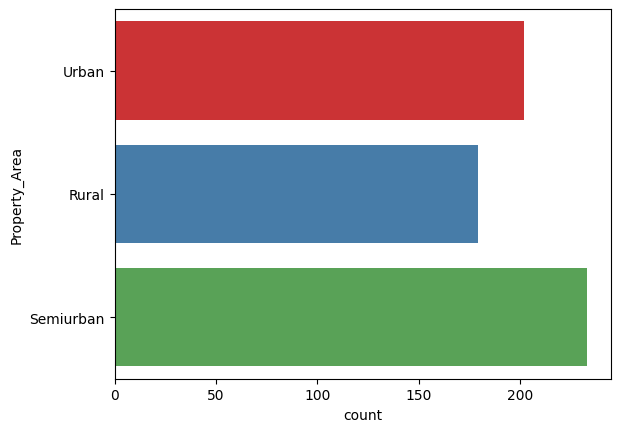

In [ ]:
sns.countplot(df['Property_Area'],palette='Set1')

<Axes: xlabel='count', ylabel='Loan_Status'>

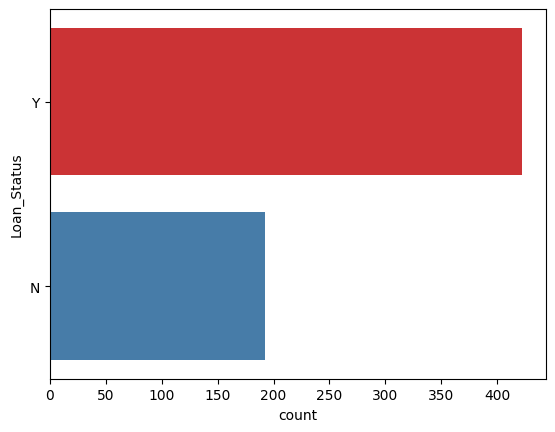

In [ ]:
sns.countplot(df['Loan_Status'],palette='Set1')

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

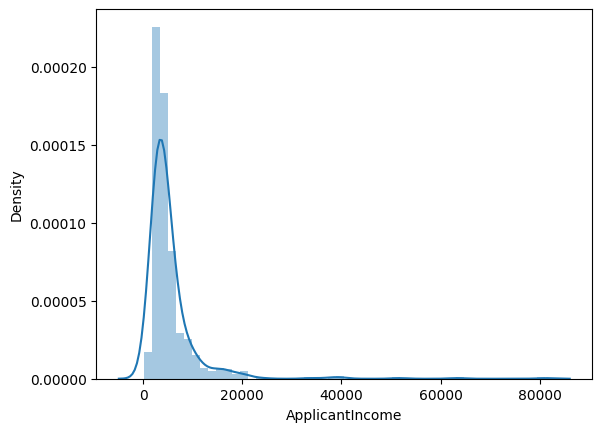

In [ ]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

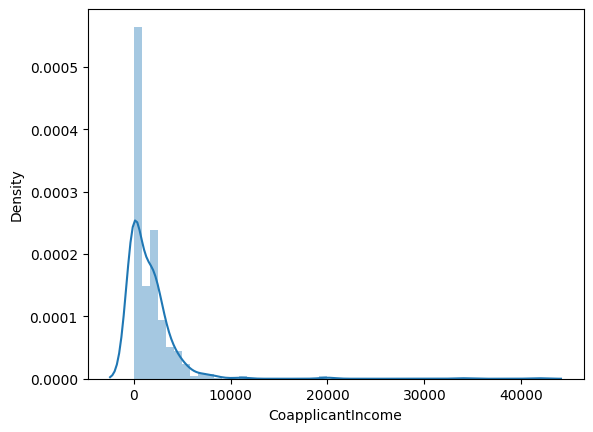

In [ ]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

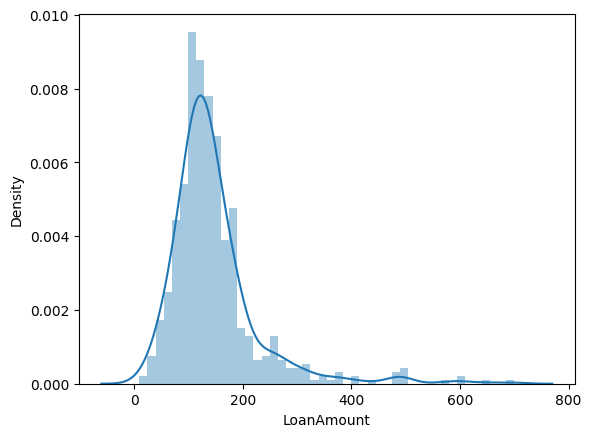

In [ ]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

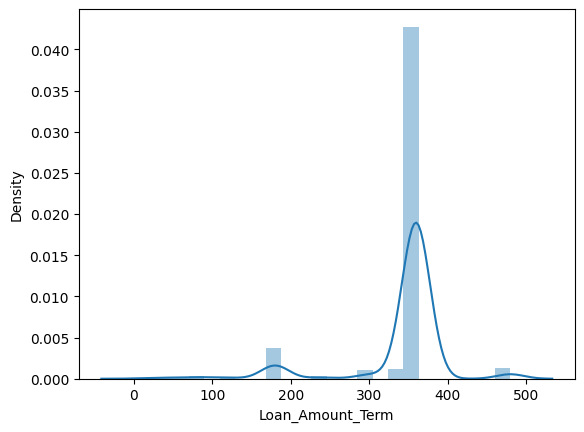

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

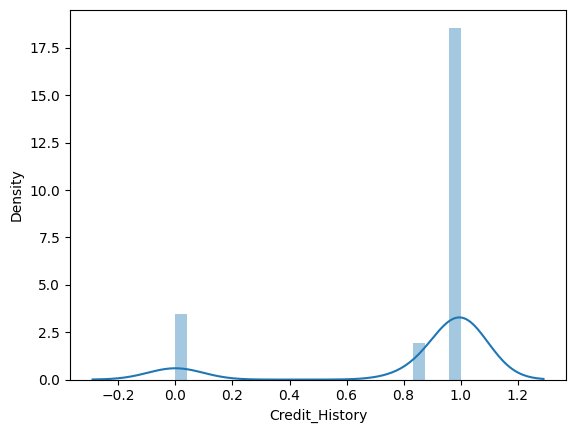

In [ ]:
sns.distplot(df['Credit_History'])

# **Creation of new attributes**

In [ ]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

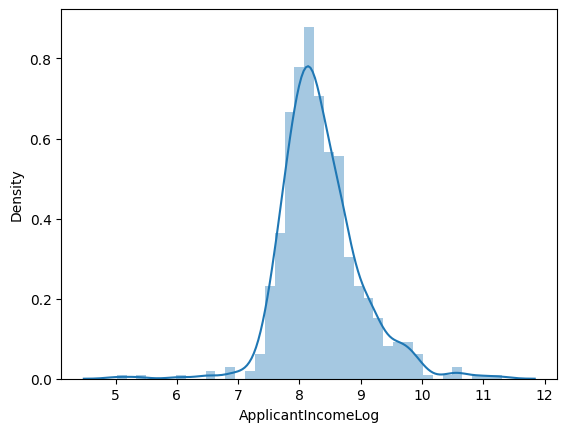

In [ ]:
# applying log transformation to the attribute

df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

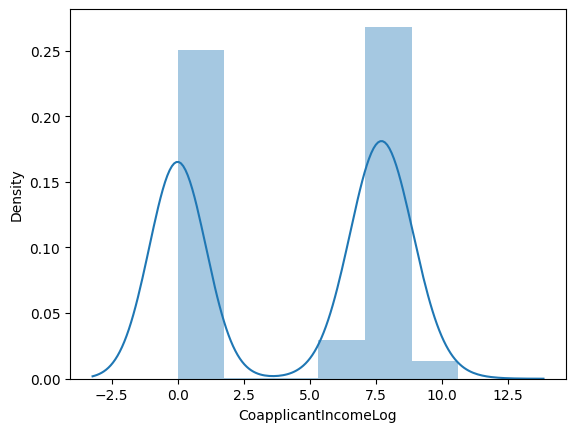

In [ ]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

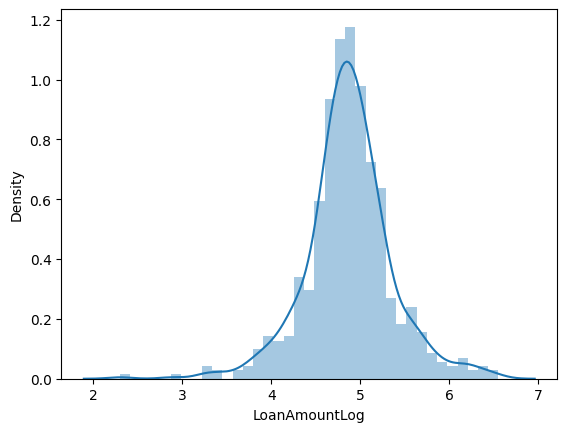

In [ ]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

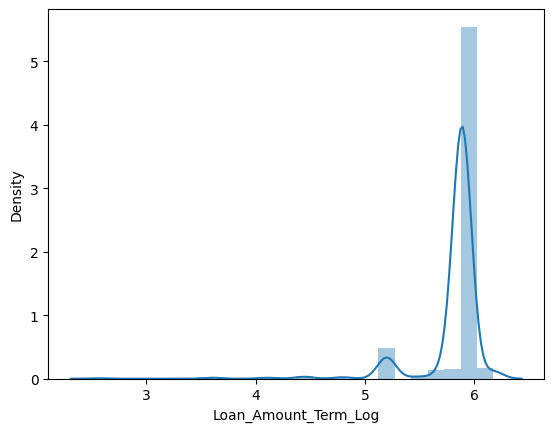

In [ ]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

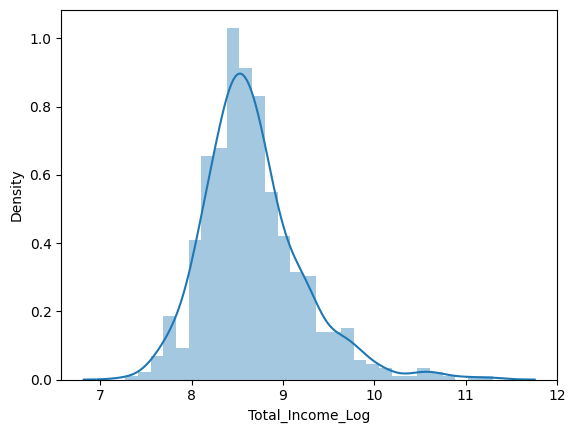

In [ ]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

# **Coorelation Matrix**

<Axes: >

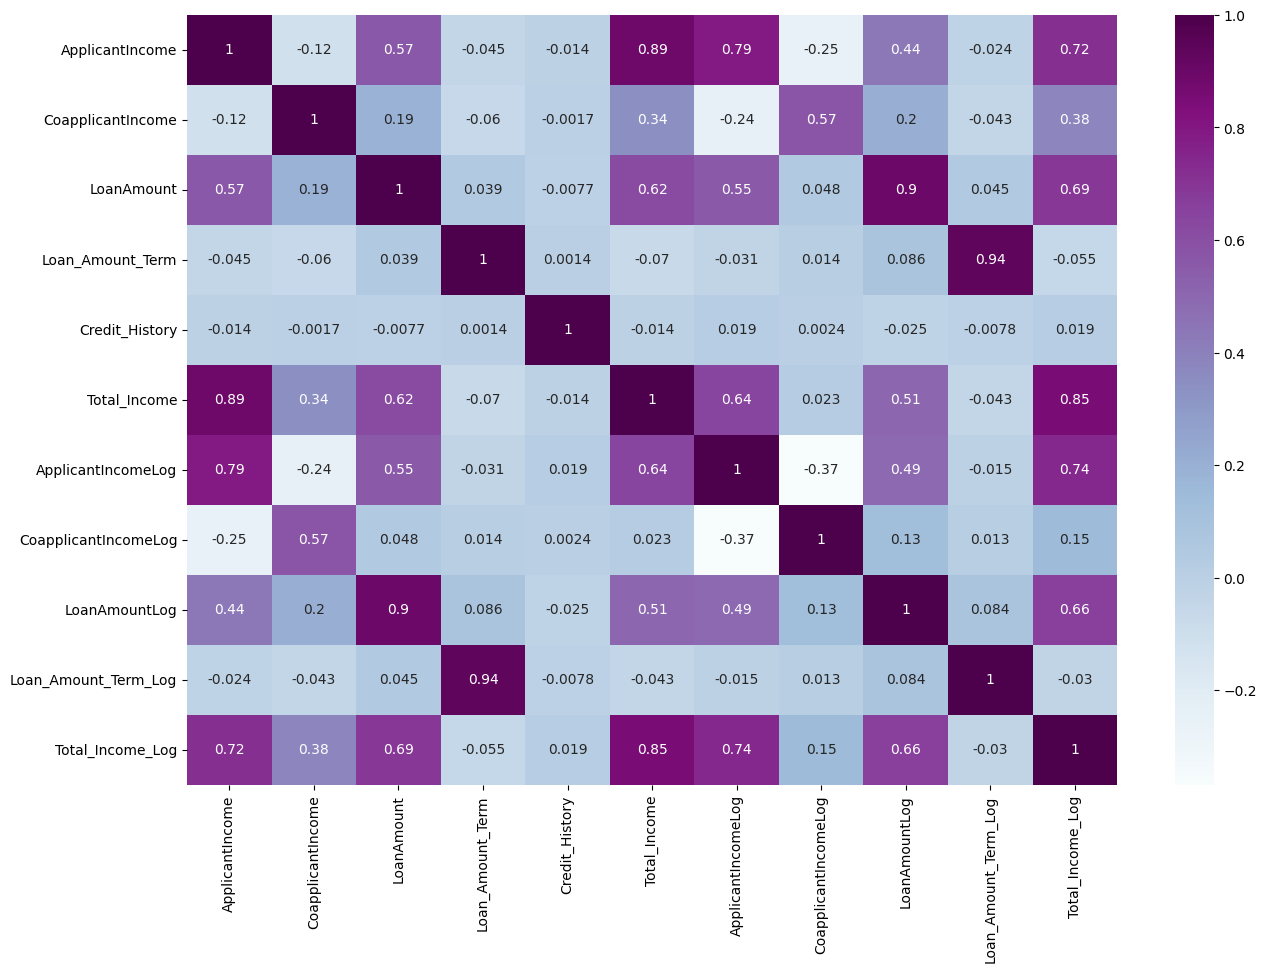

In [ ]:
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="BuPu")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [ ]:
# Drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [ ]:
# Label Encoding
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
le_dict = {}
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,Y,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,N,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,Y,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,Y,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,Y,8.699681,4.955827,5.888878,8.699681


# **Train-Test Split**

In [ ]:
# Splitting data
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **Model Training**

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 72.31507397041183


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 78.3406637345062


In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 76.87724910035986


# **Hyperparameter tuning**

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)


Accuracy is 75.97402597402598
Cross validation is 79.97067839530854


# **Confusion Matrix**

In [ ]:
# Training a model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Preprocessing and prediction functions
def preprocess_input(data):
    if 'LoanAmount' not in data or pd.isnull(data['LoanAmount']):
        data['LoanAmount'] = df['LoanAmount'].mean()
    if 'Loan_Amount_Term' not in data or pd.isnull(data['Loan_Amount_Term']):
        data['Loan_Amount_Term'] = df['Loan_Amount_Term'].mean()
    if 'Credit_History' not in data or pd.isnull(data['Credit_History']):
        data['Credit_History'] = df['Credit_History'].mean()

    categorical_defaults = {
        'Gender': df['Gender'].mode()[0],
        'Married': df['Married'].mode()[0],
        'Dependents': df['Dependents'].mode()[0],
        'Self_Employed': df['Self_Employed'].mode()[0]
    }
    for key, value in categorical_defaults.items():
        if key not in data or pd.isnull(data[key]):
            data[key] = value

    data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
    data['ApplicantIncomeLog'] = np.log(data['ApplicantIncome'] + 1)
    data['CoapplicantIncomeLog'] = np.log(data['CoapplicantIncome'] + 1)
    data['LoanAmountLog'] = np.log(data['LoanAmount'] + 1)
    data['Loan_Amount_Term_Log'] = np.log(data['Loan_Amount_Term'] + 1)
    data['Total_Income_Log'] = np.log(data['Total_Income'] + 1)

    columns_to_drop = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income"]
    for col in columns_to_drop:
        if col in data:
            del data[col]

    return data

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[23, 31],
       [ 4, 96]])

<Axes: >

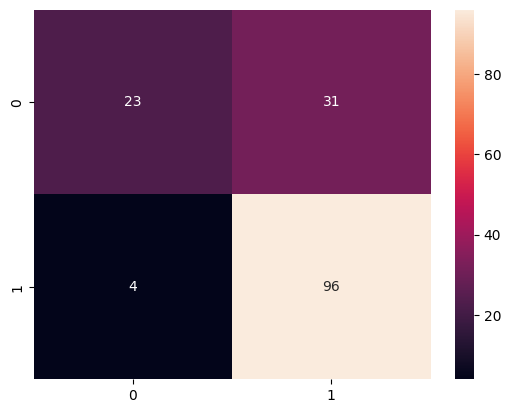

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
def predict_eligibility(model, input_data):
    data = preprocess_input(input_data)
    input_df = pd.DataFrame([data])
    for col, le in le_dict.items():
        input_df[col] = le.transform(input_df[col])
    input_df = input_df[X.columns]
    prediction = model.predict(input_df)
    return 'Eligible' if prediction[0] == 1 else 'Not Eligible'

# Collect user input
def get_user_input():
    input_data = {
        'Gender': input("Enter Gender (Male/Female): "),
        'Married': input("Enter Marital Status (Yes/No): "),
        'Dependents': input("Enter Number of Dependents (0/1/2/3+): "),
        'Education': input("Enter Education (Graduate/Not Graduate): "),
        'Self_Employed': input("Are you Self-Employed? (Yes/No): "),
        'ApplicantIncome': float(input("Enter Applicant Income: ")),
        'CoapplicantIncome': float(input("Enter Coapplicant Income: ")),
        'LoanAmount': float(input("Enter Loan Amount: ")),
        'Loan_Amount_Term': float(input("Enter Loan Amount Term: ")),
        'Credit_History': float(input("Enter Credit History (0.0/1.0): ")),
        'Property_Area': input("Enter Property Area (Urban/Rural/Semiurban): ")
    }
    return input_data

# Predict loan eligibility based on user input
input_data = get_user_input()
result = predict_eligibility(model, input_data)
print("The applicant is:", result)

Enter Gender (Male/Female): Male
Enter Marital Status (Yes/No): Yes
Enter Number of Dependents (0/1/2/3+): 2
Enter Education (Graduate/Not Graduate): Graduate
Are you Self-Employed? (Yes/No): Yes
Enter Applicant Income: 5000
Enter Coapplicant Income: 1500
Enter Loan Amount: 50000
Enter Loan Amount Term: 360
Enter Credit History (0.0/1.0): 1.0
Enter Property Area (Urban/Rural/Semiurban): Urban
The applicant is: Not Eligible
